# Chuyên đề tốt nghiệp: Áp dụng Random Forest và Logistic Regression dự báo rủi ro phá sản các doanh nghiệp BĐS trên thị trường chứng khoán Việt Nam

Mục tiêu:
- Xây dựng và đánh giá 2 mô hình 
- Giảm chiều dữ liệu bằng cách chọn ra các thuộc tính có mức độ đóng góp bằng Random Forest
- Xác định mức độ ảnh hưởng các yếu tố tác động tới rủi ro phá sản thông qua Logistic Regression



Dữ liệu: 
    13 chỉ số đại diện cho 5 nhóm chỉ số tài chính được thu thập từ báo cáo tài chính 50 doanh nghiệp BĐS trên trang web SSI IBOARD trong 10 năm
    
- Các biến bao gồm:

    -TN/TTS: Tổng nợ trên tổng tài sản
    
    -TSNH/NNH: Chỉ số thanh toán hiện hành
    
    -TNTT/CP: Khả năng chi trả lãi vay
    
    -TSTK/NNH: Chỉ số thanh toánn hanh
    
    -ROE: Khả năng sinh lời
    
    -ROA: Khả năng sinh lời
    
    -DTT/TTS: Vòng quay tổng tài sản
    
    -DDT/TSCD: Vòng quay tài sản cố định
    
    -GV/TK: Vòng quay tồn kho bình quân
    
    -TN/VCSH: Nợ trên vốn chủ sở hữu
    
    -V/VCSH: Vay trên vốn chủ sơ hữu
    
    -P/B: Chỉ số giá thị trường
    
    -P/E: Chỉ số giá thị trường
    
    -Y: Biến phụ thuộc với 2 lớp giá trị 0 là phá sản và 1 là không phá sản
    
    


In [1]:
#IMPORT các thư viện cần thiết
import numpy as np #xử lý các vđề toán học
import pandas as pd #xử lý các vđề về cấu trúc dữ liệu
import matplotlib.pyplot as plt # trực quan hóa
import seaborn as sns #trực quan hóa
from sklearn.preprocessing import StandardScaler # Chuyển hóa Z-score
from sklearn.model_selection import train_test_split # Chia tập train- test
from sklearn.metrics import classification_report #In kết quả dự báo mô hình
from sklearn.metrics import confusion_matrix # Ma trận nhầm lẫn
from sklearn.metrics import f1_score #hệ số F1
import statsmodels.api as sm # Model thống kê
from statsmodels.stats.outliers_influence import variance_inflation_factor #Kiểm định VIF

In [2]:
#đọc dữ liệu
df = pd.read_excel("C:/Users/Elden Lord/Desktop/CHUYEN DE THUC TAP/dulieucopy.xlsx") 

In [3]:
df.head(5) # in 5 cột đầu tiên của dataset

,Công ty,MCK,YEAR,TN/TTS,TSNH/NNH,TNTT/CP,TSTK/NNH,ROE,ROA,DTT/TTS,DDT/TSCD,GV/TK,TN/VCSH,V/VCSH,P/B,P/E,Y
0,NaN,API,2013,1.818770,0.897829,-1.601643,0.712264,0.180077,0.098855,0.223556,11.953071,2.116933,0.818734,0.034190,6.607546,1.092645,1
1,NaN,API,2014,2.059207,0.794935,-8.850507,0.711095,0.003699,0.001907,0.007868,0.036170,2.310704,1.059207,0.054947,24.857496,1.088611,0
2,NaN,API,2015,1.508868,2.133959,-22.397105,2.052641,0.030072,0.017253,0.003917,4.127830,4.014814,0.508868,0.036673,12.452116,1.110595,1
3,NaN,API,2016,1.925308,1.411579,-3.597892,1.254747,-0.009825,-0.005725,0.077246,15.592193,0.067158,0.925308,0.285241,7.904058,2.268248,1
4,NaN,API,2017,2.945366,1.245164,6.637358,0.824892,0.150382,0.060790,0.277660,16.701062,0.607657,1.945366,0.235978,19.178853,2.479602,1


In [4]:
df.shape # số dòng và cột

(500, 17)

In [5]:
df.columns #tên các biến

Index(['Công ty', 'MCK', 'YEAR', 'TN/TTS', 'TSNH/NNH', 'TNTT/CP', 'TSTK/NNH',
       'ROE', 'ROA', 'DTT/TTS', 'DDT/TSCD', 'GV/TK', 'TN/VCSH', 'V/VCSH',
       'P/B', 'P/E', 'Y'],
      dtype='object')

In [6]:
df.dtypes #type check

Công ty     float64
MCK          object
YEAR          int64
TN/TTS      float64
TSNH/NNH    float64
TNTT/CP     float64
TSTK/NNH    float64
ROE         float64
ROA         float64
DTT/TTS     float64
DDT/TSCD    float64
GV/TK       float64
TN/VCSH     float64
V/VCSH      float64
P/B         float64
P/E         float64
Y             int64
dtype: object

In [7]:
#Xóa các cột không cần thiết
df = df.drop(["Công ty","MCK","YEAR"],axis = 1) 

In [8]:
df1 = df.copy() # tạo bản copy 

In [9]:
df1.head() #in ra 5 dòng đầu

,TN/TTS,TSNH/NNH,TNTT/CP,TSTK/NNH,ROE,ROA,DTT/TTS,DDT/TSCD,GV/TK,TN/VCSH,V/VCSH,P/B,P/E,Y
0,1.818770,0.897829,-1.601643,0.712264,0.180077,0.098855,0.223556,11.953071,2.116933,0.818734,0.034190,6.607546,1.092645,1
1,2.059207,0.794935,-8.850507,0.711095,0.003699,0.001907,0.007868,0.036170,2.310704,1.059207,0.054947,24.857496,1.088611,0
2,1.508868,2.133959,-22.397105,2.052641,0.030072,0.017253,0.003917,4.127830,4.014814,0.508868,0.036673,12.452116,1.110595,1
3,1.925308,1.411579,-3.597892,1.254747,-0.009825,-0.005725,0.077246,15.592193,0.067158,0.925308,0.285241,7.904058,2.268248,1
4,2.945366,1.245164,6.637358,0.824892,0.150382,0.060790,0.277660,16.701062,0.607657,1.945366,0.235978,19.178853,2.479602,1


In [10]:
df1.describe() # thống kê mô tả 

,TN/TTS,TSNH/NNH,TNTT/CP,TSTK/NNH,ROE,ROA,DTT/TTS,DDT/TSCD,GV/TK,TN/VCSH,V/VCSH,P/B,P/E,Y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.466233,2.529245,6.272895,1.141829,0.090766,0.027908,0.230822,9.333619,4.420693,1.455084,0.433228,16.092997,1.160156,0.924000
std,2.010184,2.671017,14.826877,1.714708,0.218910,0.064289,0.192656,12.191134,9.501958,2.500511,1.002039,20.544860,1.102396,0.265264
min,-15.387670,0.152553,-66.000000,0.031806,-1.122121,-0.553456,-0.121220,-10.322785,-14.598835,-30.387670,-10.457052,-87.524788,0.070124,0.000000
25%,1.565532,1.305226,0.178604,0.410968,0.015873,0.007041,0.091643,1.982791,0.692538,0.561628,0.082642,5.470320,0.484853,1.000000
50%,2.195023,1.822006,2.817464,0.745419,0.074139,0.026346,0.186351,5.408069,2.075334,1.195023,0.246166,10.642990,0.821394,1.000000
75%,3.093633,2.581934,9.601839,1.245049,0.149952,0.052534,0.325979,11.688780,5.103195,2.079480,0.565343,21.714721,1.465956,1.000000
max,16.532450,23.730925,95.385204,19.318376,2.959048,0.284511,1.607254,108.704044,161.976577,25.571371,14.973309,100.356012,8.331479,1.000000


Thống kê mô tả bao gồm: số quan sát, giá trị trung bình, độ lệch chuẩn, giá trị lớn nhất, giá trị nhỏ nhất và tứ phân vị

1    462
0     38
Name: Y, dtype: int64


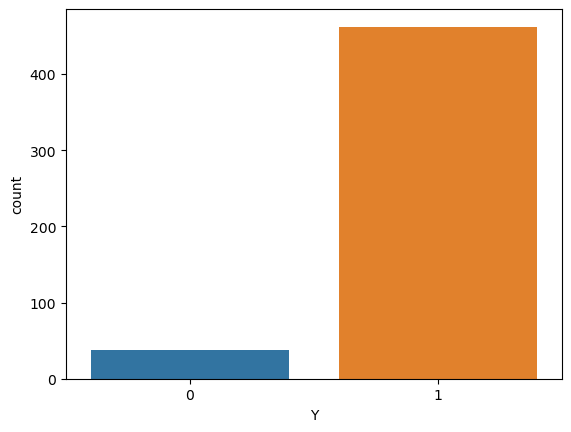

In [11]:
# mô tả biến Y
sns.countplot(x = df1['Y'], data = df1) 
print(df1["Y"].value_counts())

=>Mất cân bằng nghiêm trọng giữa 2 lớp thiểu số và đa số, có thể gây ra hiện tượng học quá nhiều trên lớp đa số khiến Model bị overfitting



In [11]:
#Tách biến phụ thuộc và độc lập 
X =df1.drop(columns=['Y'])
y = df1['Y']

In [12]:
# kiểm tra giá trị khuyết thiếu (tương đương với giá trị 0)
X.isin([0]).sum()

TN/TTS       0
TSNH/NNH     0
TNTT/CP     26
TSTK/NNH     0
ROE          0
ROA          0
DTT/TTS      3
DDT/TSCD     8
GV/TK       16
TN/VCSH      0
V/VCSH      28
P/B          2
P/E          0
dtype: int64

Giá trị khuyết thiếu chiếm tỷ lệ khá nhỏ=> có thể thay thế bằng giá trị mean

In [14]:
# Thay thế giá trị 0 bằng mean
for i in X.columns:
    mean = X[i].mean()
    X[i] = X[i].replace(0,mean)

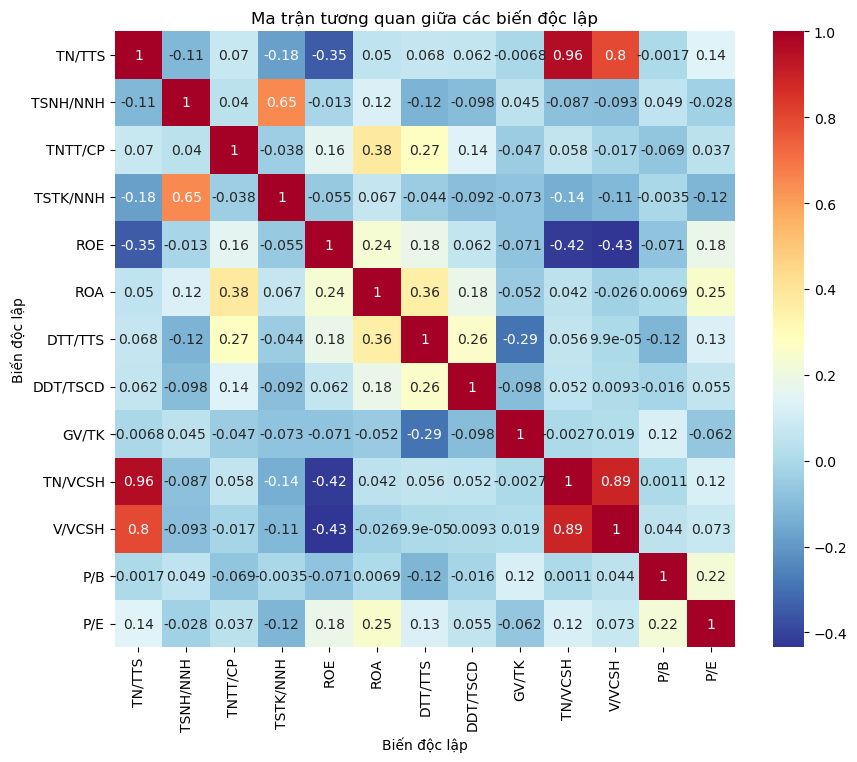

In [15]:
#Ma trận hệ số tương quan giữa các biến độc lập
matrix = X.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(matrix, annot=True, cmap='RdYlBu_r')  
plt.title('Ma trận tương quan giữa các biến độc lập')  
plt.xlabel('Biến độc lập')  
plt.ylabel('Biến độc lập')  
plt.show()

       Các cặp biến tương quan cao (>0.7 hoặc <-0.7) cần được xem xét trước khi đưa vào Hồi quy Logistics tránh hiện tượng  đa cộng tuyến gây sai lệch các hệ số hồi quy.

### RANDOM FOREST 

Các tham số cần quan tâm đến của mô hình RF gồm:

n_estimators: số cây quyết định con có trong mô hình.

Criterion: Tiêu chí phân chia ngưỡng (Gini-index hoặc Entropy).

Max_depth: Độ sâu tối đa của cây, độ sâu quá lớn mô hình có thể bị overfit.

Min_sample_split: Số lượng mẫu tối thiểu trong mỗi node, khi không đủ mẫu phân để chia thì node thành node lá.

Min_sample_leaf: Số lượng mỗi tối thiểu phải có trong lá, nếu không đủ thì cây phân chia cho tới khi mẫu tối thiểu > Min_sample_split.

Max_features: Số lượng biến độc lập của cây con được chọn ngẫu nhiên trong quá trình boostrapping.

Max_leaf_node: Số lượng node lá tối đa của cây con.

Max_samples: Số lượng mẫu để huấn luyện cây con.
    
Min_impurity_decrease: mô hình sẽ phân chia một node nếu như độ giảm tinh khiết lớn hơn chỉ tiêu này.

Obb_score: tính toán trên tập out-of-bag để ước lượng sai số của mô hình khi không cần tệp Test.

    Để tìm ra các hệ số giúp mô hình tối ưu có thể sử dụng GridSearchCV với k-fold crossvalidation 

In [15]:
# Chia tập train và test theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train.shape, X_test.shape

((400, 13), (100, 13))

In [16]:
#Sử dụng sinh dữ liệu bằng SMOTE trên lớp thiểu số của tập train
from imblearn.over_sampling import SMOTE
smote = SMOTE() # định nghĩa hàm SMOTE
X_upsample_train, y_upsample_train = smote.fit_resample(X_train, y_train) #fit hàm vào tập train

# In ra kết quả 2 trước và sau khi SMOTE bằng .value_counts()
print('Trước khi SMOTE:')
print(y_train.value_counts())
print('\nSau khi SMOTE:')
print(y_upsample_train.value_counts()) 

Trước khi SMOTE:
1    371
0     29
Name: Y, dtype: int64

Sau khi SMOTE:
1    371
0    371
Name: Y, dtype: int64


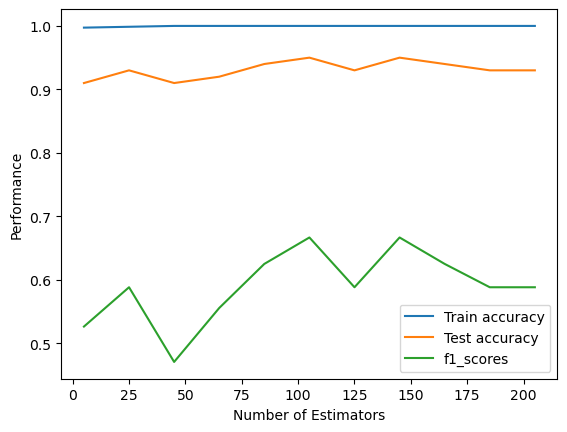

In [17]:
# Kiểm tra xem số cây cho RF tốt nhất là bao nhiêu để truyền tham số 
# Tạo các LIST tương ứng với độ chính xác của tập train, test và F1-score
num_estimators= range(5, 206, 20) # tạo tham số tương ứng với số cây để truyền vào mô hình
test_scores = []
train_scores = []
f1_scores = []

# Chạy thử model RF dựa trên các tham số ngẫu nhiên bằng vòng lặp for 
from sklearn.ensemble import RandomForestClassifier
for num in num_estimators:
    model = RandomForestClassifier(n_estimators=num) #truyền tham số cây trong khoảng (5,206) 
    model.fit(X_upsample_train, y_upsample_train) # fit model
    y_pred = model.predict(X_test) #dự đoán trên tập test
    train_accuracy = model.score(X_upsample_train, y_upsample_train) # tạo biến là độ chính xác tập train
    test_accuracy = model.score(X_test, y_test) # tạo biến là độ giá trị chính xác tập test 
    f1 = f1_score(y_test, y_pred,pos_label=y_test.value_counts().idxmin()) # tạo biến là F1-score của lớp thiểu số
    
    # truyền các chỉ số vào LIST đã tạo lập ban đầu
    train_scores.append(train_accuracy) 
    test_scores.append(test_accuracy)
    f1_scores.append(f1)
    
# Trực quan các chỉ số bằng biểu đồ 
plt.plot(num_estimators, train_scores, label='Train accuracy')
plt.plot(num_estimators, test_scores, label='Test accuracy')
plt.plot(num_estimators, f1_scores, label='f1_scores')
plt.xlabel('Number of Estimators')
plt.ylabel('Performance')
plt.legend();

Hiệu suất mô hình đại diện bởi hệ số F1-score dự đoán trên lớp thiểu số của tập test giao động cao ở ngưỡng 70-200+ cây con

In [18]:
# import thư viện để tìm tham số tốt nhất với GridSearchCV phương pháp Cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier #
# Định nghĩa 3 tham số cần thiết để tìm kiếm theo lưới
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [6,7,8],
    'min_samples_split': [5,8]
}

# Tạo GridSearchCV object với 5-fold crossvalid , hiệu suất dựa vào f1-score
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,scoring='f1-score')

# Tiến hành tìm kiếm siêu tham số tốt nhất
best_model = grid_search.fit(X_upsample_train, y_upsample_train)

#Tiến hành dự báo trên tập test để tìm ra các tham số tốt nhất
prediction =  best_model.predict(X_test)
best_model.best_params_ #in ra tham số 

{'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 200}

In [23]:
#Chạy lại model với tham số tốt nhất và in ra kết quả dựa trên classfication report
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators = 200 , max_depth = 8, min_samples_split =5) # tạo biến rf2 là mô hình
rf2.fit(X_upsample_train,y_upsample_train) # fit mô hình vào tập train
rf2_pred =rf2.predict(X_test) # dự đoán trên tập test
print(classification_report(y_test,rf2_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.97      0.97      0.97        91

    accuracy                           0.94       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.94      0.94      0.94       100



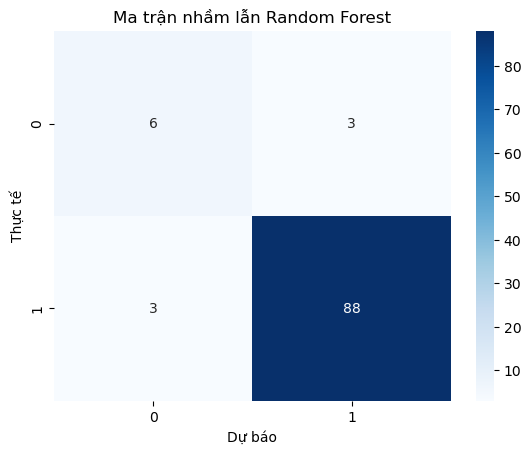

In [25]:
# Tạo ma trận nhầm lẫn dựa trên 100 quan sát trên tập train, từ đó tính được 4 chỉ số đánh giá hiệu suất mô hình
cm = confusion_matrix(y_test, rf2_pred) #tạo biến là ma trận nhầm lẫn trên kết quả dự báo tập test
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d') #dùng biểu đồ nhiệt với biến cm đã tạo
#Tạo tên các trục gồm Tiêu đề, trục x, trục y và show biểu đồ
plt.title('Ma trận nhầm lẫn Random Forest') 
plt.xlabel('Dự báo')
plt.ylabel('Thực tế')
plt.show()

Kết quả dự đoán mô hình trên tập test có 100 quan sát gồm 91 doanh nghiệp không phá sản và 9 doanh nghiệp phá sản cho thấy:

Mô hình dự đoán đúng 88+6 = 94 quan sát (Accuracy = 0.94) 

Dự đoán đúng 6 doanh nghiệp gặp phá sản trên tổng số 9 doanh nghiệp thực sự phá sản (Recall =  0.67)

Dự đoán đúng 6 doanh nghiệp gặp phá sản trên tổng số 9 doanh nghiệp được dự báo là phá sản (Precision  = 0.67)

Hệ số F1-score = 0.67 cho thấy hiệu suất mô hình ở mức tạm ổn

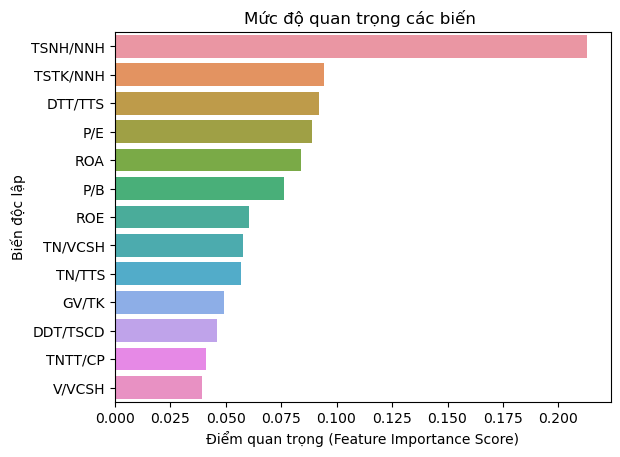

In [38]:
#Mức độ quan trọng các biến tính toán dựa trên độ giảm GINI
feature_scores = pd.Series(rf2.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_scores, y=feature_scores.index) #trực quan bằng barplot, trục x là điểm, y là các biến và giá trị
plt.xlabel('Điểm quan trọng (Feature Importance Score)')
plt.ylabel('Biến độc lập')
plt.title("Mức độ quan trọng các biến ")
plt.show()

Feature importance được tính bằng Gini_impurity_decrease  => Gini giảm càng nhiều biến càng quan trọng 

Các biến đều đóng góp vào mô hình => không cần loại biến nào

## Hồi quy Logistic 

In [39]:
#Tạo bản copy thứ 2 
df2 = df.copy()

In [40]:
#kiểm tra 5 dòng đầu
df2.head()

,TN/TTS,TSNH/NNH,TNTT/CP,TSTK/NNH,ROE,ROA,DTT/TTS,DDT/TSCD,GV/TK,TN/VCSH,V/VCSH,P/B,P/E,Y
0,1.818770,0.897829,-1.601643,0.712264,0.180077,0.098855,0.223556,11.953071,2.116933,0.818734,0.034190,6.607546,1.092645,1
1,2.059207,0.794935,-8.850507,0.711095,0.003699,0.001907,0.007868,0.036170,2.310704,1.059207,0.054947,24.857496,1.088611,0
2,1.508868,2.133959,-22.397105,2.052641,0.030072,0.017253,0.003917,4.127830,4.014814,0.508868,0.036673,12.452116,1.110595,1
3,1.925308,1.411579,-3.597892,1.254747,-0.009825,-0.005725,0.077246,15.592193,0.067158,0.925308,0.285241,7.904058,2.268248,1
4,2.945366,1.245164,6.637358,0.824892,0.150382,0.060790,0.277660,16.701062,0.607657,1.945366,0.235978,19.178853,2.479602,1


In [41]:
#Tách biến độc lập và biến phụ thuộc
X_lr =df2.drop(columns=['Y'])
y_lr = df2['Y']

In [42]:
#Thay thế giá trị 0 thành mean
for i in X.columns:
    mean = X[i].mean()
    X[i] = X[i].replace(0,mean)

In [29]:
#Kiểm định VIF
X_lr = df2.drop(columns = ['Y'])
vif = pd.DataFrame()
vif["Features"] = X_lr.columns
vif["VIF Factor"] = [variance_inflation_factor(X_lr.values, i) for i in range(X_lr.shape[1])]
print(vif)

    Features  VIF Factor
0     TN/TTS   21.205275
1   TSNH/NNH    3.339447
2    TNTT/CP    1.476937
3   TSTK/NNH    2.661354
4        ROE    1.763152
5        ROA    1.700716
6    DTT/TTS    2.964479
7   DDT/TSCD    1.712265
8      GV/TK    1.303321
9    TN/VCSH   26.185118
10    V/VCSH    6.955025
11       P/B    1.758596
12       P/E    2.526829


Để tránh hiện tượng đa cộng tuyến xảy ra trong mô hình làm sai lệch độ tin cậy của hệ số hồi quy kéo theo mô hình không chính xác => Sử dụng hệ số phóng đại VIF để kiểm tra hiện tượng đa cộng tuyến (VIF lớn hơn 10 => mô hình xảy ra hiện tượng đa cộng tuyến)

In [45]:
X_lr = X_lr.drop(columns= ["TN/VCSH"])
vif = pd.DataFrame()
vif["Features"] = X_lr.columns
vif["VIF Factor"] = [variance_inflation_factor(X_lr.values, i) for i in range(X_lr.shape[1])]
print(vif)

    Features  VIF Factor
0     TN/TTS    5.911214
1   TSNH/NNH    3.328333
2    TNTT/CP    1.476064
3   TSTK/NNH    2.625686
4        ROE    1.594368
5        ROA    1.638324
6    DTT/TTS    2.796308
7   DDT/TSCD    1.705270
8      GV/TK    1.243583
9     V/VCSH    3.434286
10       P/B    1.680819
11       P/E    2.497819


kết quả không còn hiện tượng đa cộng tuyến ( VIF các biến < 5 nên có mối tương quan bình thường và có thể đưa vào mô hình )

In [46]:
#Xử lý outliers bằng chuẩn hóa thống kê StandardScaler
scaler = StandardScaler()
# Fit dữ liệu vào scaler để tính toán trung bình và độ lệch chuẩn
scaler.fit(X_lr)
# Áp dụng chuẩn hóa dữ liệu
X_lr = scaler.transform(X_lr)
X_lr= pd.DataFrame(X_lr)
X_lr.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.322414,-0.611396,-0.531631,-0.250769,0.408390,1.104665,-0.037753,0.215080,-0.242694,-0.398624,-0.462157,-0.061302
1,-0.202685,-0.649957,-1.021021,-0.251451,-0.398128,-0.404832,-1.158423,-0.763404,-0.222281,-0.377889,0.427030,-0.064965
2,-0.476734,-0.148139,-1.935587,0.531708,-0.277534,-0.165902,-1.178949,-0.427442,-0.042758,-0.396144,-0.177394,-0.045003
3,-0.269362,-0.418861,-0.666403,0.065919,-0.459966,-0.523667,-0.797947,0.513885,-0.458631,-0.147833,-0.398987,1.006173
4,0.238592,-0.481227,0.024606,-0.185019,0.272604,0.511978,0.243361,0.604933,-0.401691,-0.197046,0.150351,1.198088


Xử lý outliers bằng cách sử dụng chuẩn hóa thống kê làm giá trị trung bình các biến
bằng 0 và độ lệch chuẩn bằng 1

In [51]:
#Chia tập và SMOTE 
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size = 0.2,random_state=42)
X_train_lr.shape, X_test_lr.shape
smote = SMOTE(random_state=42)
X_upsample_train_lr, y_upsample_train_lr = smote.fit_resample(X_train_lr, y_train_lr)

In [49]:
#Import thư viện statmodels 
import statsmodels.api as sm
X_upsample_train_lr = sm.add_constant(X_upsample_train_lr) #tạo hằng số
X_test_lr = sm.add_constant(X_test_lr) #tạo hằng số
logit = sm.Logit(y_upsample_train_lr, X_upsample_train_lr) #fit model logit
result = logit.fit() 
print(result.summary()) #in ra bảng model summary

Optimization terminated successfully.
         Current function value: 0.436928
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                  742
Model:                          Logit   Df Residuals:                      729
Method:                           MLE   Df Model:                           12
Date:                Wed, 03 Jan 2024   Pseudo R-squ.:                  0.3696
Time:                        20:49:48   Log-Likelihood:                -324.20
converged:                       True   LL-Null:                       -514.32
Covariance Type:            nonrobust   LLR p-value:                 5.778e-74
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4341      0.281      8.677      0.000       1.884       2.984
0             -1.1416      0.

psedo R-Square = 0.3696 => 36.96% sự biến thiên của Y được giải thích bởi các biến độc lập

Log-Likelihood > LL-Null => Mô hình có biến độc lập giải thích tốt hơn mô hình rỗng (k có biến độc lập)

LLR p-value < 0.05 => Đủ điều kiện bác bỏ giả thuyết cho rằng các biến độc lập không có ý nghĩa khi giải thích sự biến thiến của biến phụ thuộc
Với mức ý nghĩa 5% các biến có hệ số hồi quy được kiểm định với p-value < 0.05 => không có ý nghĩa thống kê 

In [54]:
#Huấn luyện mô hình để dự báo
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_upsample_train_lr, y_upsample_train_lr)
y_pred_lr = lr.predict(X_test_lr)
print(classification_report(y_test_lr,y_pred_lr))

              precision    recall  f1-score   support

           0       0.22      0.44      0.30         9
           1       0.94      0.85      0.89        91

    accuracy                           0.81       100
   macro avg       0.58      0.65      0.59       100
weighted avg       0.87      0.81      0.84       100



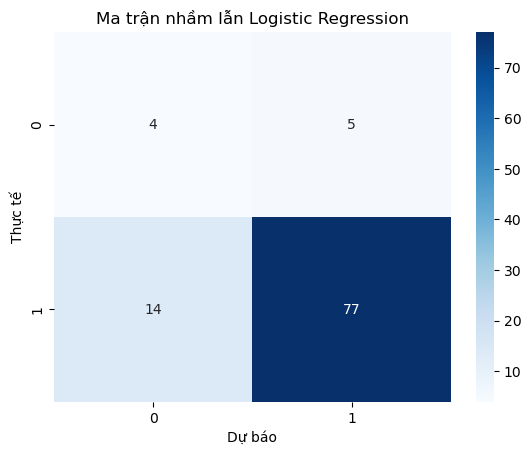

In [55]:
#Ma trận nhầm lẫn
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test_lr, y_pred_lr)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Ma trận nhầm lẫn Logistic Regression')
plt.xlabel('Dự báo')
plt.ylabel('Thực tế')
plt.show()

Kết quả mô hình dự báo trên tập test với 100 quan sát trong đó có 9 doanh nghiệp bị phá sản và 91 doanh nghiệp không bị phá sản cho thấy:
    
- Mô hình dự đoán đúng 77+4 = 81 trường hợp (Accuracy = 0.81)
- Dự đoán sai 14 doanh nghiệp không phá sản thành phá sản trên tổng 18 doanh nghiệp được dự báo phá sản (Precision = 0.22)
- Dự đoán sai 5 doanh nghiệp phá sản thành không phá sản trên tổng 9 doanh nghiệp thực sự phá sản (Recall = 0.44)
- F1-score =0.3 => khá thấp cho thấy mô hình dự báo các doanh nghiệp gặp phá sản khá kém


Kết luận:
- Random Forest ưu thế việc chỉ cần học trên dữ liệu sẵn có mà không cần quan tâm đến mối tương quan giữa các biến như 
Hồi quy Logistic đã cho ra kết quả hiệu suất tốt hơn về dự đoán doanh nghiệp gặp phá sản (Recall, Precision, F1-score) đều cao hơn
- Hồi quy Logistic đánh giá được mức độ ảnh hưởng các biến, mô hình cho thấy một số biến có độ đóng góp vào mô hình RF nhưng ko có ý  nghĩa thống kê khi xây dựng mô hình Hồi quy Logit, bên cạnh đó mô hình cũng gặp khó khăn khi phân loại doanh nghiệp không gặp phá sản 
thành phá sản kéo theo hiệu suất mô hình rất thấp
- Biến có đóng góp lớn nhất  và có mức ảnh hưởng đến khả năng phá sản lớn nhất cả 2 mô hình đều là TSHNH/NHH
- Việc kết hợp 2 mô hình khi xây dựng bài toán cung cấp góc nhìn toàn diện để đưa ra các giải pháp điều chỉnh phù hợp đối với từng yếu tố.